In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [99]:
data = pd.read_csv("train.csv")

In [100]:
data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,658.0,25.0,0.50,0.38,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.403311,0.406869,31.935479,4356.94587
1,1,109.0,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.538704,0.463065,37.033298,6374.44430
2,2,564.0,25.0,0.50,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.474625,0.436043,34.338492,5462.13394
3,3,674.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.543972,0.441470,36.301847,6443.25690
4,4,467.0,25.0,0.50,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.566319,0.461905,36.047770,6643.90190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,691.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.568854,0.467220,39.988734,6757.07366
14996,14996,348.0,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.596753,0.497979,41.782127,7536.09687
14997,14997,261.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.509158,0.453131,36.924839,6255.89064
14998,14998,155.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.397279,0.402856,30.906861,4051.55129


In [101]:
from pandas_visual_analysis import VisualAnalysis
import seaborn as sns
VisualAnalysis(data)

In [102]:
data.dtypes

id                        int64
Row#                    float64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [103]:
data.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,425.581267,19.719333,0.389244,0.284588,0.485845,0.591301,82.150340,49.660020,68.638773,59.213653,28.655240,48.553540,18.730664,0.325960,0.500698,0.445770,36.106349,6019.556436
std,4330.271354,213.611550,6.678575,0.406638,0.058933,0.148237,0.146388,9.087681,5.510267,7.590940,6.567238,3.179366,5.356475,11.798220,0.165694,0.076970,0.038424,4.117149,1360.514312
min,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,33.000000,1.000000,0.000000,0.163962,0.000000,22.079199,1637.704020
25%,3749.750000,245.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451083,0.418056,33.231562,5086.609910
50%,7499.500000,466.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.445497,35.988555,6109.850470
75%,11249.250000,596.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472468,39.158238,7044.567610
max,14999.000000,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,50.800000,55.900000,34.000000,0.560000,0.848908,0.854364,46.585105,8969.401840


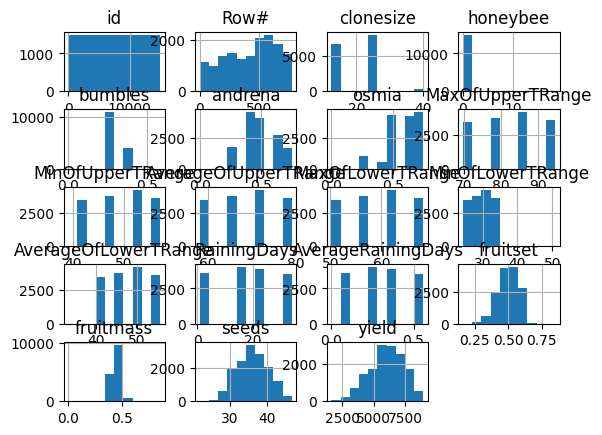

In [104]:
data.hist()
plt.show()

In [105]:
(data.isna().sum()/len(data))*100

id                      0.0
Row#                    0.0
clonesize               0.0
honeybee                0.0
bumbles                 0.0
andrena                 0.0
osmia                   0.0
MaxOfUpperTRange        0.0
MinOfUpperTRange        0.0
AverageOfUpperTRange    0.0
MaxOfLowerTRange        0.0
MinOfLowerTRange        0.0
AverageOfLowerTRange    0.0
RainingDays             0.0
AverageRainingDays      0.0
fruitset                0.0
fruitmass               0.0
seeds                   0.0
yield                   0.0
dtype: float64

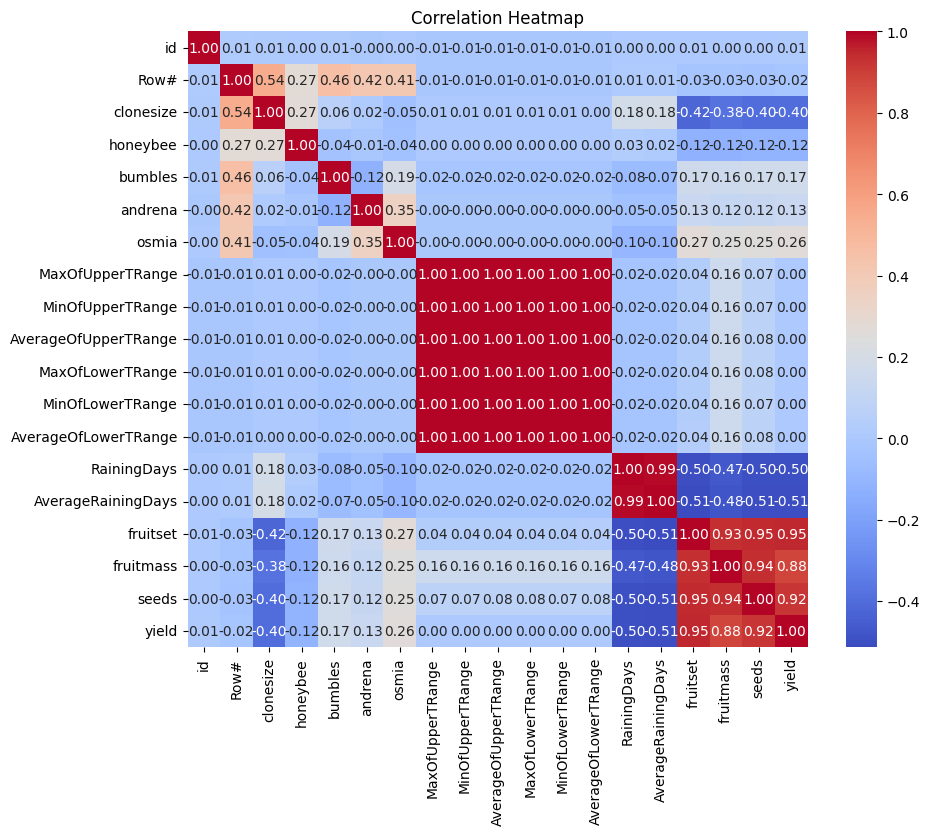

In [106]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [107]:
X = data.drop(['yield'], axis=1)
y = data['yield']

columns_to_drop = [
    'MaxOfUpperTRange', 'MinOfUpperTRange',
    'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'id'
]
X.drop(columns=columns_to_drop, inplace=True)

In [108]:
from sklearn.preprocessing import RobustScaler
Scaler=RobustScaler()
X = Scaler.fit_transform(X)

In [109]:
test_data = pd.read_csv("test.csv")

In [110]:
test_data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,706.0,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.508275,0.453868,36.018624
1,15001,265.0,12.5,0.25,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.552359,0.455405,38.534569
2,15002,395.0,12.5,0.25,0.38,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.611726,0.509528,42.799055
3,15003,565.0,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.506794,0.452310,36.674243
4,15004,16.0,37.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.386065,0.391583,30.274972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,75.0,12.5,0.25,0.25,0.25,0.38,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.502842,0.450498,36.810187
9996,24996,255.0,12.5,0.25,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.470593,0.436777,33.441606
9997,24997,416.0,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.623063,0.511053,43.974703
9998,24998,586.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.375384,0.394606,31.368310


In [111]:
X_test = test_data

columns_to_drop = [
    'MaxOfUpperTRange', 'MinOfUpperTRange',
    'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'id'
]
X_test.drop(columns=columns_to_drop, inplace=True)

In [112]:
X_test

,Row#,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,706.0,25.0,0.50,0.38,0.50,0.50,64.7,45.8,0.26,0.508275,0.453868,36.018624
1,265.0,12.5,0.25,0.25,0.63,0.50,58.2,41.2,0.26,0.552359,0.455405,38.534569
2,395.0,12.5,0.25,0.38,0.38,0.75,64.7,45.8,0.39,0.611726,0.509528,42.799055
3,565.0,25.0,0.50,0.25,0.63,0.63,79.0,55.9,0.26,0.506794,0.452310,36.674243
4,16.0,37.5,0.25,0.25,0.25,0.25,71.9,50.8,0.39,0.386065,0.391583,30.274972
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,75.0,12.5,0.25,0.25,0.25,0.38,64.7,45.8,0.26,0.502842,0.450498,36.810187
9996,255.0,12.5,0.25,0.25,0.50,0.75,64.7,45.8,0.39,0.470593,0.436777,33.441606
9997,416.0,12.5,0.25,0.38,0.50,0.63,71.9,50.8,0.26,0.623063,0.511053,43.974703
9998,586.0,25.0,0.50,0.25,0.63,0.75,79.0,55.9,0.10,0.375384,0.394606,31.368310


In [114]:

import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression




In [115]:
xgb_reg = XGBRegressor(random_state=42)
cb_reg = CatBoostRegressor(verbose=0, random_state=42)
lgbm_reg = LGBMRegressor(random_state=42)

xgb_pipe = make_pipeline(RobustScaler(), xgb_reg)
cb_pipe = make_pipeline(RobustScaler(), cb_reg)
lgbm_pipe = make_pipeline(RobustScaler(), lgbm_reg)




In [116]:
param_grid_xgb = {
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2,0.001,0.0001,0.3],
    'xgbregressor__n_estimators': [100, 200, 500,300,400,600,700],
    'xgbregressor__max_depth': [3, 5, 10,7,9,8],
    'xgbregressor__min_child_weight': [1, 3, 5,7,9,11],
    'xgbregressor__subsample': [0.8, 1.0],
    'xgbregressor__colsample_bytree': [0.8, 1.0],
}

param_grid_cb = {
    'catboostregressor__learning_rate': [0.01, 0.1, 0.2],
    'catboostregressor__depth': [6, 8, 10],
    'catboostregressor__iterations': [100, 200, 500],
}


param_grid_lgbm = {
    'lgbmregressor__learning_rate': [0.01, 0.1, 0.2],
    'lgbmregressor__n_estimators': [100, 200, 500],
    'lgbmregressor__max_depth': [-1, 10, 20],
    'lgbmregressor__num_leaves': [31, 50, 70],
    'lgbmregressor__min_child_samples': [20, 30, 40],
}



: 

In [117]:
grid_search_xgb = GridSearchCV(estimator=xgb_pipe, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search_cb = GridSearchCV(estimator=cb_pipe, param_grid=param_grid_cb, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
grid_search_lgbm = GridSearchCV(estimator=lgbm_pipe, param_grid=param_grid_lgbm, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

grid_search_xgb.fit(X, y)
grid_search_cb.fit(X, y)
grid_search_lgbm.fit(X, y)



Fitting 3 folds for each of 6048 candidates, totalling 18144 fits


In [ ]:
best_xgb = grid_search_xgb.best_estimator_
best_cb = grid_search_cb.best_estimator_
best_lgbm = grid_search_lgbm.best_estimator_

print("Best XGBoost Parameters:", grid_search_xgb.best_params_)
print("Best XGBoost Cross-Validation MAE:", -grid_search_xgb.best_score_)
print("Best CatBoost Parameters:", grid_search_cb.best_params_)
print("Best CatBoost Cross-Validation MAE:", -grid_search_cb.best_score_)
print("Best LightGBM Parameters:", grid_search_lgbm.best_params_)
print("Best LightGBM Cross-Validation MAE:", -grid_search_lgbm.best_score_)



Best XGBoost Parameters: {'xgbregressor__colsample_bytree': 1.0, 'xgbregressor__learning_rate': 0.01, 'xgbregressor__max_depth': 5, 'xgbregressor__min_child_weight': 3, 'xgbregressor__n_estimators': 500, 'xgbregressor__subsample': 0.8}
Best XGBoost Cross-Validation MAE: 249.24313807821872
Best CatBoost Parameters: {'catboostregressor__depth': 6, 'catboostregressor__iterations': 200, 'catboostregressor__learning_rate': 0.1}
Best CatBoost Cross-Validation MAE: 252.30480230602623
Best LightGBM Parameters: {'lgbmregressor__learning_rate': 0.01, 'lgbmregressor__max_depth': -1, 'lgbmregressor__min_child_samples': 30, 'lgbmregressor__n_estimators': 500, 'lgbmregressor__num_leaves': 31}
Best LightGBM Cross-Validation MAE: 249.52727054911927


In [ ]:
estimators = [
    ('XGB', best_xgb),
    ('CB', best_cb),
    ('LGBM', best_lgbm)
]

meta_reg = LinearRegression()


In [ ]:

SR = StackingRegressor(estimators=estimators, final_estimator=meta_reg, cv=3)

SR.fit(X, y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 12
[LightGBM] [Info] Start training from score 6019.556438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 12
[LightGBM] [Info] Start training from score 6019.462936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

StackingRegressor(cv=3,
                  estimators=[('XGB',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('xgbregressor',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=1.0,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=None,
                                                             feature_types=None,
                                                             gamma=None,
                                                             grow_polic...
                                                             random_state=42, ...))])),
                              ('CB',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('catboostregressor',
                                                <catboost.core.CatBoostRegressor object at 0x0000027EDBC7F9B0>)])),
                              ('LGBM',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('lgbmregressor',
                                                LGBMRegressor(learning_rate=0.01,
                                                              min_child_samples=30,
                                                              n_estimators=500,
                                                              random_state=42))]))],
                  final_estimator=LinearRegression())

In [ ]:

stacking_predictions = SR.predict(X)
stacking_mae = mean_absolute_error(y, stacking_predictions)
print("Stacking Regressor MAE on Full Data:", stacking_mae)

stacking_scores = cross_val_score(SR, X, y, cv=3, scoring='neg_mean_absolute_error')
print("Stacking Regressor Cross-Validation MAE Scores:", -stacking_scores)
print("Mean Stacking Regressor Cross-Validation MAE:", -stacking_scores.mean())

Stacking Regressor MAE on Full Data: 236.21808733781683
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1069
[LightGBM] [Info] Number of data points in the train set: 10000, number of used features: 12
[LightGBM] [Info] Start training from score 6019.462936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1065
[LightGBM] [Info] Number of data points in the train set: 6666, number of used features: 12
[LightGBM] [Info] Start training from score 6026.920962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_

In [ ]:
X_test = Scaler.fit_transform(X_test)

In [ ]:
y_pred = SR.predict(X_test)

In [ ]:
test_data = pd.read_csv("test.csv")
submission = pd.DataFrame({
    'id': test_data['id'],  
    'Yield': y_pred
})

submission.to_csv('submission.csv', index=False)